# 1. Preparo ambiente

In [1]:
from binance.client import Client
from datetime import datetime
from backtesting import Backtest, Strategy
from backtesting.lib import plot_heatmaps

import multiprocessing
import pandas as pd
import numpy as np

multiprocessing.set_start_method('fork', force=True)

#TODO: mover a variables de entorno
api_key = ''
secret_key = ''

client = Client(api_key, secret_key)

/Users/nelsonrios/opt/anaconda3/lib/python3.8/site-packages/backtesting/_plotting.py:45: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [261]:
%%time
bars = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1MINUTE, "4 week ago UTC")

def cast_string_to_float(data):
    if type(data) == str:
        casted_data = float(data)
    else:
        casted_data = datetime.fromtimestamp(data/1000.0)
    return casted_data

# delete unwanted data - just keep date, open, high, low, close
formated_bars = []
for line in bars:
    del line[6:]
    # cast string numbers to integer
    formated_bars.append(list(map(cast_string_to_float, line)))

#  store data in a dataframe
btc_df = pd.DataFrame(formated_bars, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
btc_df.set_index('Date', inplace=True)
# Converting the index as date
btc_df.index = pd.to_datetime(btc_df.index)
btc_df

CPU times: user 947 ms, sys: 196 ms, total: 1.14 s
Wall time: 1min 41s


,Open,High,Low,Close,Volume
Date,,,,,
2021-06-07 14:15:00,35683.87,35690.89,35607.42,35620.18,49.291739
2021-06-07 14:16:00,35620.17,35673.06,35575.00,35657.37,107.309092
2021-06-07 14:17:00,35657.38,35690.80,35634.85,35642.22,44.568227
2021-06-07 14:18:00,35642.17,35671.01,35610.00,35656.14,43.147291
2021-06-07 14:19:00,35655.85,35709.55,35652.56,35679.83,47.014176
...,...,...,...,...,...
2021-07-05 14:11:00,33669.13,33670.00,33623.00,33630.85,21.495957
2021-07-05 14:12:00,33630.85,33648.99,33625.00,33630.99,12.145124
2021-07-05 14:13:00,33630.99,33636.99,33617.57,33622.29,13.812790


# 2. Agrego predictores

In [5]:
from talib import *
import numpy as np



In [262]:
%%time
data = btc_df.copy()

# data['rsi_1min'] = RSI(data['Close'], timeperiod=14)
# data['rsi_1min_change_1'] = data['rsi_1min'].pct_change()
# data['rsi_5min'] = RSI(data['Close'], timeperiod=70)
# data['rsi_5min_change_1'] = data['rsi_5min'].pct_change()
# data['rsi_30min'] = RSI(data['Close'], timeperiod=420)
# data['rsi_30min_change_1'] = data['rsi_30min'].pct_change()
# data['rsi_1h'] = RSI(data['Close'], timeperiod=840)
# data['rsi_1h_change_1'] = data['rsi_1h'].pct_change()
# data['rsi_4h'] = RSI(data['Close'], timeperiod=3360)
# data['rsi_4h_change_1'] = data['rsi_4h'].pct_change()


# Percentage changes
# data['PctChange_1'] = data['Close'].pct_change()
# data['PctChange_5'] = data['Close'].pct_change(periods=5)
# data['PctChange_10'] = data['Close'].pct_change(periods=10)
# data['PctChange_12'] = data['Close'].pct_change(periods=12)
# data['PctChange_15'] = data['Close'].pct_change(periods=15)
# data['PctChange_30'] = data['Close'].pct_change(periods=30)
# data['PctChange_30'] = data['Close'].pct_change(periods=50)
# data['PctChange_60'] = data['Close'].pct_change(periods=60)
# data['PctChange_100'] = data['Close'].pct_change(periods=100)
# data['PctChange_200'] = data['Close'].pct_change(periods=200)
# data['PctChange_500'] = data['Close'].pct_change(periods=500)
# data['PctChange_900'] = data['Close'].pct_change(periods=900)

# # Distance from moving averages
# data['Sma_5'] = (data['Close'] - data['Close'].rolling(5).mean()) / data['Close']
# data['Sma_10'] = (data['Close'] - data['Close'].rolling(10).mean()) / data['Close']
# data['Sma_12'] = (data['Close'] - data['Close'].rolling(12).mean()) / data['Close']
# data['Sma_15'] = (data['Close'] - data['Close'].rolling(15).mean()) / data['Close']
# data['Sma_30'] = (data['Close'] - data['Close'].rolling(30).mean()) / data['Close']
# data['Sma_50'] = (data['Close'] - data['Close'].rolling(50).mean()) / data['Close']
# data['Sma_60'] = (data['Close'] - data['Close'].rolling(60).mean()) / data['Close']
# data['Sma_100'] = (data['Close'] - data['Close'].rolling(60).mean()) / data['Close']
# data['Sma_200'] = (data['Close'] - data['Close'].rolling(200).mean()) / data['Close']
# data['Sma_500'] = (data['Close'] - data['Close'].rolling(500).mean()) / data['Close']
# data['Sma_900'] = (data['Close'] - data['Close'].rolling(900).mean()) / data['Close']

# # Moving averages velocity (percentage change)
# data['Sma_5_pctc'] = data['Sma_5'].pct_change(periods=5)
# data['Sma_10_pctc'] = data['Sma_10'].pct_change(periods=10)
# data['Sma_12_pctc'] = data['Sma_12'].pct_change(periods=12)
# data['Sma_15_pctc'] = data['Sma_15'].pct_change(periods=15)
# data['Sma_30_pctc'] = data['Sma_30'].pct_change(periods=30)
# data['Sma_50_pctc'] = data['Sma_50'].pct_change(periods=50)
# data['Sma_60_pctc'] = data['Sma_60'].pct_change(periods=60)
# data['Sma_100_pctc'] = data['Sma_100'].pct_change(periods=100)

# # Momentum indicators
# data['Apo_12_26'] = APO(data['Close'], fastperiod=12, slowperiod=26) / data['Close']
# data['Apo_5_10'] = APO(data['Close'], fastperiod=5, slowperiod=10) / data['Close']
# data['Apo_10_20'] = APO(data['Close'], fastperiod=10, slowperiod=20) / data['Close']
# data['Apo_15_30'] = APO(data['Close'], fastperiod=15, slowperiod=30) / data['Close']
# data['Apo_20_50'] = APO(data['Close'], fastperiod=20, slowperiod=50) / data['Close']
# data['Apo_50_100'] = APO(data['Close'], fastperiod=50, slowperiod=100) / data['Close']
# data['Apo_50_200'] = APO(data['Close'], fastperiod=50, slowperiod=200) / data['Close']
# data['Apo_100_200'] = APO(data['Close'], fastperiod=100, slowperiod=200) / data['Close']

# data['aroonosc_14'] = AROONOSC(data['High'], data['Low'], timeperiod=14)
# data['aroonosc_5'] = AROONOSC(data['High'], data['Low'], timeperiod=5)
# data['aroonosc_10'] = AROONOSC(data['High'], data['Low'], timeperiod=10)
# data['aroonosc_12'] = AROONOSC(data['High'], data['Low'], timeperiod=12)
# data['aroonosc_30'] = AROONOSC(data['High'], data['Low'], timeperiod=30)
# data['aroonosc_50'] = AROONOSC(data['High'], data['Low'], timeperiod=50)
# data['aroonosc_60'] = AROONOSC(data['High'], data['Low'], timeperiod=60)
# data['aroonosc_100'] = AROONOSC(data['High'], data['Low'], timeperiod=100)
# data['aroonosc_200'] = AROONOSC(data['High'], data['Low'], timeperiod=200)
# data['aroonosc_500'] = AROONOSC(data['High'], data['Low'], timeperiod=500)
# data['aroonosc_900'] = AROONOSC(data['High'], data['Low'], timeperiod=900)

# data['bop_1'] = BOP(data['Open'], data['High'], data['Low'], data['Close'])
# data['bop_3'] = data['bop_1'].rolling(3).mean()
# data['bop_5'] = data['bop_1'].rolling(5).mean()
# data['bop_10'] = data['bop_1'].rolling(10).mean()
# data['bop_20'] = data['bop_1'].rolling(20).mean()

# data['cci_14'] = CCI(data['High'], data['Low'], data['Close'], timeperiod=14)
# data['cci_5'] = CCI(data['High'], data['Low'], data['Close'], timeperiod=5)
# data['cci_30'] = CCI(data['High'], data['Low'], data['Close'], timeperiod=30)
# data['cci_50'] = CCI(data['High'], data['Low'], data['Close'], timeperiod=50)
# data['cci_100'] = CCI(data['High'], data['Low'], data['Close'], timeperiod=100)
# data['cci_200'] = CCI(data['High'], data['Low'], data['Close'], timeperiod=200)

# data['mfi_14'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=14)
# data['mfi_5'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=5)
# data['mfi_30'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=30)
# data['mfi_50'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=50)
# data['mfi_60'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=60)
# data['mfi_100'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=100)
# data['mfi_200'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=200)



# # Volume indicator
# data['obv_1'] = OBV(data['Close'], data['Volume'])
# data['obv_3'] = data['obv_1'].rolling(3).mean()
# data['obv_5'] = data['obv_1'].rolling(5).mean()
# data['obv_10'] = data['obv_1'].rolling(10).mean()
# data['obv_20'] = data['obv_1'].rolling(20).mean()

# # Volatility indicators
# data['std_dev_chg_3'] = data['PctChange_1'].rolling(3).std()
# data['std_dev_chg_5'] = data['PctChange_1'].rolling(5).std()
# data['std_dev_chg_10'] = data['PctChange_1'].rolling(10).std()
# data['std_dev_chg_20'] = data['PctChange_1'].rolling(20).std()


# data['std_dev_5'] = data['Close'].rolling(5).std()
# data['std_dev_10'] = data['Close'].rolling(10).std()
# data['std_dev_20'] = data['Close'].rolling(20).std()
# data['std_dev_30'] = data['Close'].rolling(30).std()
# data['std_dev_50'] = data['Close'].rolling(50).std()
# data['std_dev_100'] = data['Close'].rolling(100).std()
# data['std_dev_200'] = data['Close'].rolling(200).std()
# data['std_dev_500'] = data['Close'].rolling(500).std()
# data['std_dev_900'] = data['Close'].rolling(900).std()

# data['coef_var_3'] = data['Close'].rolling(3).std() / data['Close'].rolling(3).mean()
# data['coef_var_5'] = data['Close'].rolling(5).std() / data['Close'].rolling(5).mean()
# data['coef_var_10'] = data['Close'].rolling(10).std() / data['Close'].rolling(10).mean()
# data['coef_var_20'] = data['Close'].rolling(20).std() / data['Close'].rolling(20).mean()
# data['coef_var_30'] = data['Close'].rolling(30).std() / data['Close'].rolling(30).mean()
# data['coef_var_50'] = data['Close'].rolling(50).std() / data['Close'].rolling(50).mean()
# data['coef_var_100'] = data['Close'].rolling(100).std() / data['Close'].rolling(100).mean()
# data['coef_var_200'] = data['Close'].rolling(200).std() / data['Close'].rolling(200).mean()

# data['kurtosis_5'] = data['PctChange_1'].rolling(5).kurt()
# data['kurtosis_10'] = data['PctChange_1'].rolling(10).kurt()
# data['kurtosis_20'] = data['PctChange_1'].rolling(20).kurt()
# data['kurtosis_30'] = data['PctChange_1'].rolling(30).kurt()
# data['kurtosis_50'] = data['PctChange_1'].rolling(50).kurt()
# data['kurtosis_100'] = data['PctChange_1'].rolling(100).kurt()
# data['kurtosis_200'] = data['PctChange_1'].rolling(200).kurt()
# data['kurtosis_500'] = data['PctChange_1'].rolling(500).kurt()
# data['kurtosis_900'] = data['PctChange_1'].rolling(900).kurt()

# data['skewness_5'] = data['PctChange_1'].rolling(5).skew()
# data['skewness_10'] = data['PctChange_1'].rolling(10).skew()
# data['skewness_20'] = data['PctChange_1'].rolling(20).skew()
# data['skewness_30'] = data['PctChange_1'].rolling(30).skew()
# data['skewness_50'] = data['PctChange_1'].rolling(50).skew()
# data['skewness_100'] = data['PctChange_1'].rolling(100).skew()
# data['skewness_200'] = data['PctChange_1'].rolling(200).skew()
# data['skewness_500'] = data['PctChange_1'].rolling(500).skew()
# data['skewness_900'] = data['PctChange_1'].rolling(900).skew()

# data['natr_14'] = NATR(data['High'], data['Low'], data['Close'], timeperiod=14)
# data['natr_3'] = NATR(data['High'], data['Low'], data['Close'], timeperiod=3)
# data['natr_5'] = NATR(data['High'], data['Low'], data['Close'], timeperiod=5)
# data['natr_10'] = NATR(data['High'], data['Low'], data['Close'], timeperiod=10)
# data['natr_20'] = NATR(data['High'], data['Low'], data['Close'], timeperiod=20)


# data['previous_candle_green'] = np.where(data.shift(1)['PctChange_1'] >= 0, 1, 0)
# data['greens_in_3'] = data['previous_candle_green'].rolling(3).sum()
# data['greens_in_5'] = data['previous_candle_green'].rolling(5).sum()
# data['greens_in_10'] = data['previous_candle_green'].rolling(10).sum()
# data['greens_in_15'] = data['previous_candle_green'].rolling(15).sum()
# data['greens_in_20'] = data['previous_candle_green'].rolling(20).sum()
# data['greens_in_30'] = data['previous_candle_green'].rolling(30).sum()

# data['previous_candle_red'] = np.where(data.shift(1)['PctChange_1'] < 0, 1, 0)
# data['reds_in_3'] = data['previous_candle_red'].rolling(3).sum()
# data['reds_in_5'] = data['previous_candle_red'].rolling(5).sum()
# data['reds_in_10'] = data['previous_candle_red'].rolling(10).sum()
# data['reds_in_15'] = data['previous_candle_red'].rolling(15).sum()
# data['reds_in_20'] = data['previous_candle_red'].rolling(20).sum()
# data['reds_in_30'] = data['previous_candle_red'].rolling(30).sum()

# data['distance_std_dev_20'] = abs(data['Close'] - data['Close'].rolling(20).mean())/data['std_dev_20']
# data['distance_std_dev_50'] = abs(data['Close'] - data['Close'].rolling(50).mean())/data['std_dev_50']
# data['distance_std_dev_200'] = abs(data['Close'] - data['Close'].rolling(200).mean())/data['std_dev_200']


data.dropna(inplace=True)

CPU times: user 43.7 ms, sys: 12.1 ms, total: 55.8 ms
Wall time: 56.1 ms


In [263]:
print('Number of predictors:', data.shape[1] - 5)

Number of predictors: 10


# 3. Agrego lo que vamos a quere predecir

In [264]:
data_full = data.copy()

In [265]:
data = data_full.copy()
data.dropna(inplace=True)
prediction_period = 5

data['forward'] = data['Close'].shift(-prediction_period)/data['Close'] - 1
data['target'] = 0
data.loc[data['forward'] >= 0, 'target'] = 1

data.drop(data.tail(prediction_period).index,inplace=True) # drop last prediction_period rows (since we don't have the forward values for these)

In [266]:
# Aislo indicadores
indicators = data.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume', 'target', 'forward'])

indicators

,rsi_1min,rsi_1min_change_1,rsi_5min,rsi_5min_change_1,rsi_30min,rsi_30min_change_1,rsi_1h,rsi_1h_change_1,rsi_4h,rsi_4h_change_1
Date,,,,,,,,,,
2021-06-09 22:16:00,60.743254,0.027720,52.691958,0.006137,53.382776,0.000934,52.848843,0.000474,50.610359,0.000129
2021-06-09 22:17:00,60.061329,-0.011226,52.597197,-0.001798,53.367749,-0.000281,52.841455,-0.000140,50.608592,-0.000035
2021-06-09 22:18:00,61.532544,0.024495,52.869215,0.005172,53.409337,0.000779,52.862326,0.000395,50.614048,0.000108
2021-06-09 22:19:00,55.340410,-0.100632,52.015126,-0.016155,53.275008,-0.002515,52.796341,-0.001248,50.598280,-0.000312
2021-06-09 22:20:00,52.543369,-0.050542,51.599735,-0.007986,53.209116,-0.001237,52.763950,-0.000613,50.590535,-0.000153
...,...,...,...,...,...,...,...,...,...,...
2021-07-05 14:06:00,56.805391,0.076487,50.652625,0.014180,47.707640,0.002063,47.829303,0.001041,49.492022,0.000222
2021-07-05 14:07:00,59.312315,0.044132,51.122328,0.009273,47.773358,0.001378,47.862583,0.000696,49.499362,0.000148
2021-07-05 14:08:00,59.409035,0.001631,51.140314,0.000352,47.775866,0.000052,47.863853,0.000027,49.499642,0.000006


# 4. Preparo el modelo

In [342]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'entropy', max_depth=10, min_samples_leaf=int(len(results_train)/100))

# Reparto resultados

ONE_WEEK = 10080
ONE_DAY = 1440

time_frame = ONE_WEEK

# Reviso proporcion de resultados
results_train = list(data['target'][:-time_frame])
results_test = list(data['target'][-time_frame:])

indicators_train = indicators.iloc[:-time_frame]
indicators_test = indicators.iloc[-time_frame:]

print('Cantidad de datos de entrenamiento: ', len(results_train))
print('Cantidad de datos para testeo: ', len(results_test))
print('Proporcion de resultados positivos:', round(sum(results_train)/len(results_train) * 100, 2), '%')

Cantidad de datos de entrenamiento:  26875
Cantidad de datos para testeo:  10080
Proporcion de resultados positivos: 49.12 %


In [343]:
%%time
model.fit(indicators_train, results_train)

CPU times: user 269 ms, sys: 8.52 ms, total: 278 ms
Wall time: 319 ms


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=268)

# 5. Evaluo predicciones

In [344]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score

results_predicted = model.predict(indicators_test)
matrix = np.array(confusion_matrix(results_test, results_predicted, normalize='all'))

print('Accuracy:', round(accuracy_score(results_test, results_predicted)*100, 2), '%')

Accuracy: 52.17 %


In [345]:
#len(model.feature_importances_)
#len(indicators.columns)
a = model.feature_importances_.copy()

estimator_importances = pd.DataFrame(data = model.feature_importances_, index = indicators.columns)

In [346]:
estimator_importances.sort_values(0).tail(20)

,0
rsi_1h_change_1,0.000000
rsi_30min_change_1,0.008931
rsi_1min_change_1,0.009499
rsi_4h_change_1,0.010759
rsi_5min,0.030630
rsi_4h,0.081531
rsi_5min_change_1,0.084133
rsi_1h,0.093387
rsi_30min,0.179691
rsi_1min,0.501439


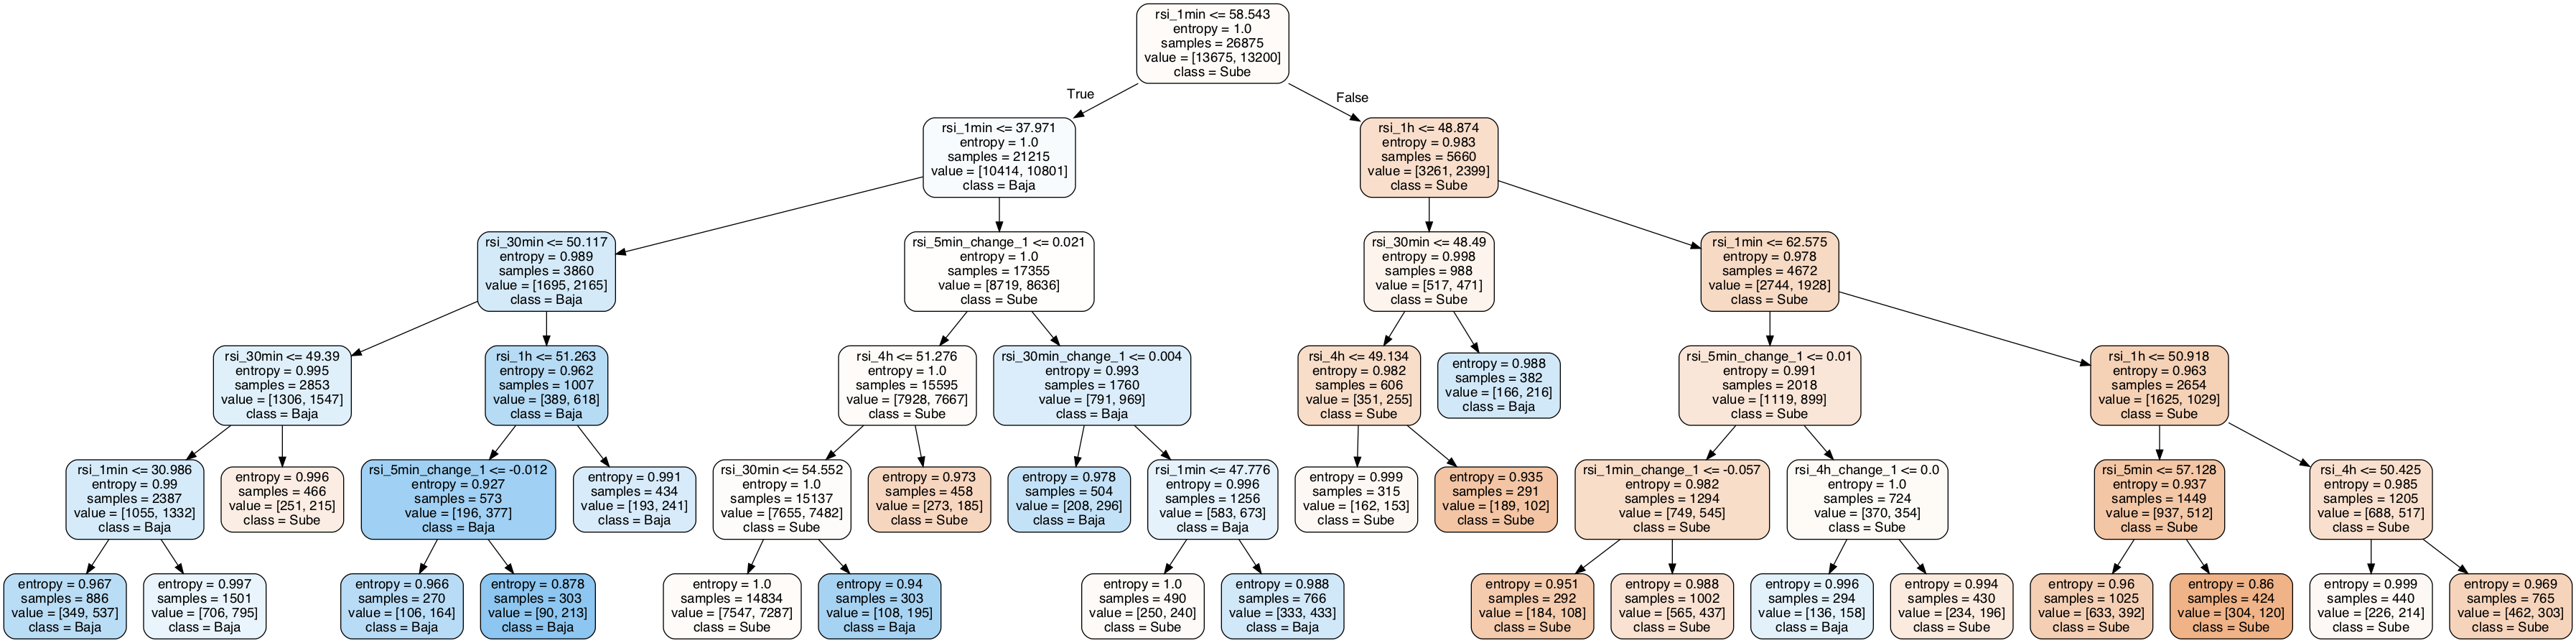

In [347]:
from IPython.display import Image  
from sklearn import tree
import pydotplus
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

targets = ['Sube','Baja']

dot_data = tree.export_graphviz(model, out_file=None, feature_names=indicators_train.columns, 
                                class_names=targets, rounded = True, filled= True)

graph = pydotplus.graph_from_dot_data(dot_data)  

# guardo la imagen en disco
graph.write_png("RSI14.png")

# imprimo en pantalla
Image(graph.create_png())

In [373]:
# Reviso la entropia de los nodos hoja

n_nodes = model.tree_.node_count
children_left = model.tree_.children_left
children_right = model.tree_.children_right
n_node_samples = model.tree_.n_node_samples
impurity = model.tree_.impurity

weighted_entropy = 0

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

for i in range(n_nodes):
    if is_leaves[i]:
        weighted_entropy += impurity[i] * n_node_samples[i] 

print('Entropia promedio:', round(weighted_entropy/n_node_samples[0], 3))

Entropia promedio: 0.988


# 6. Reviso probabilidades de estimacion

In [349]:
r= model.predict_proba(indicators_test)

In [392]:
backtest = pd.DataFrame(data=r, columns=['Down prob', 'Up prob'])
backtest['Actual'] = results_test
backtest['Correct'] = 0
backtest['Predicted'] = 0
prob_threshold = 0.6

backtest.loc[(backtest['Down prob'] > prob_threshold) & (backtest['Actual'] == 0), 'Correct'] = 1
backtest.loc[(backtest['Up prob'] >= prob_threshold) & (backtest['Actual'] == 1), 'Correct'] = 1
backtest.loc[(backtest['Down prob'] >= prob_threshold) | (backtest['Up prob'] >= prob_threshold), 'Predicted'] = 1

print('Accuracy: ', backtest['Correct'].sum()/backtest['Predicted'].sum())
print('Predicted: ', backtest['Predicted'].sum()/len(backtest))
print('Total predictions:', backtest['Predicted'].sum())

Accuracy:  0.582441113490364
Predicted:  0.18531746031746033
Total predictions: 1868


array([[<AxesSubplot:title={'center':'Up prob'}>]], dtype=object)

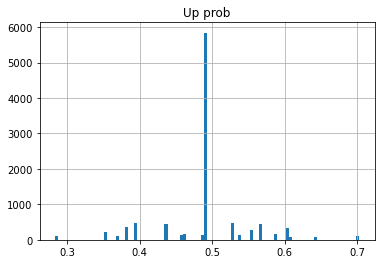

In [352]:
backtest.hist(column='Up prob', bins=100)

# 6. Resultados